In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import geoplot

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


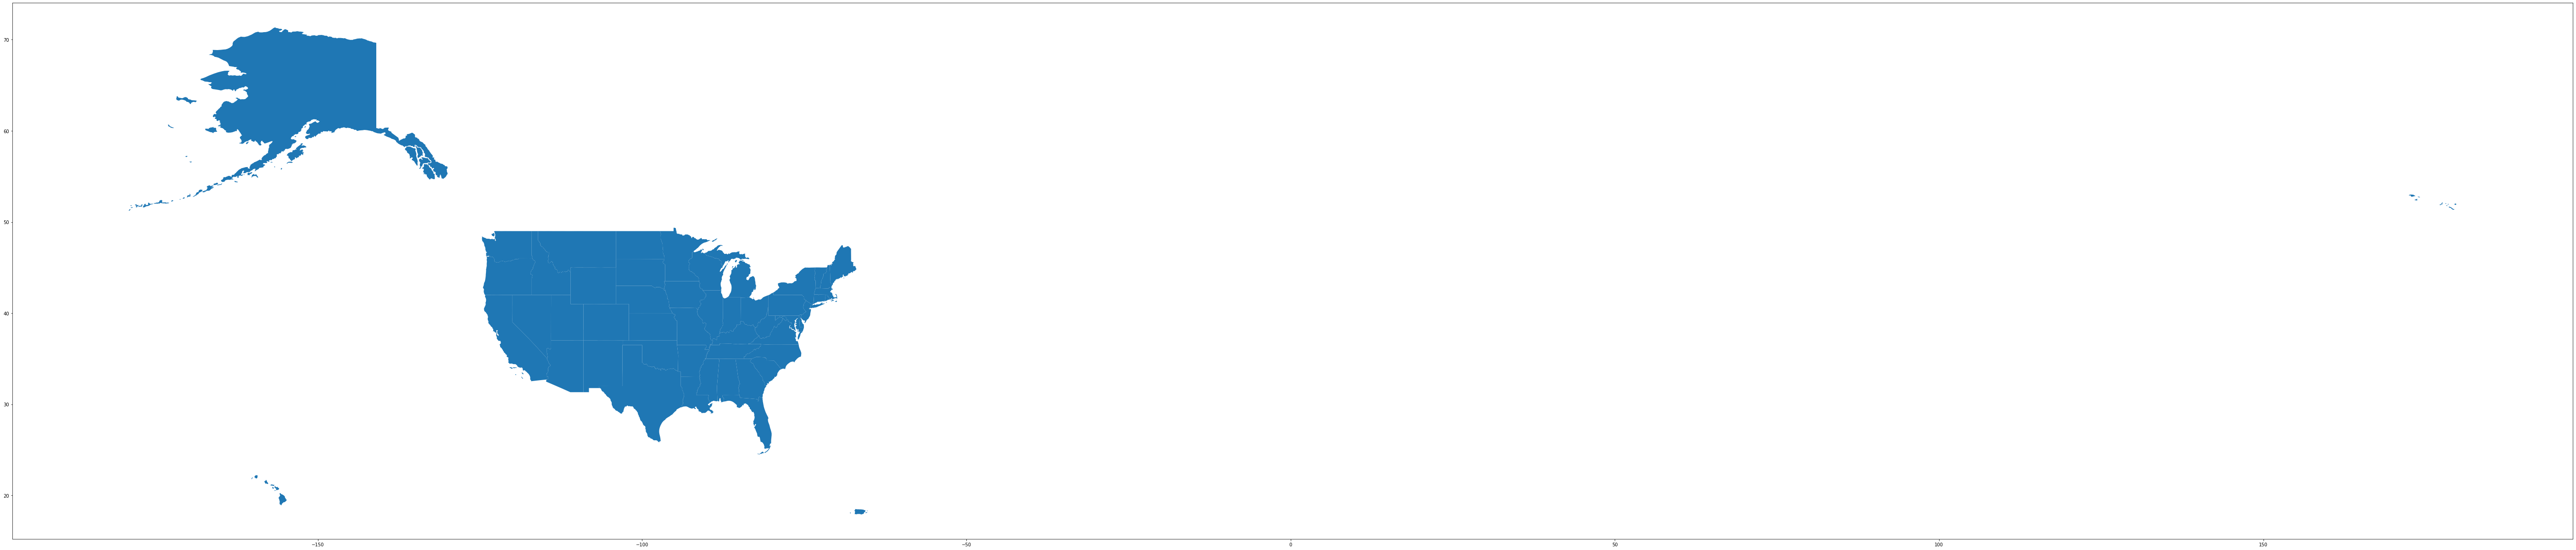

In [3]:
map_df = gpd.read_file("cb_2018_us_state_20m\cb_2018_us_state_20m.shp")
# map_df is a Pandas dataframe
f, ax = plt.subplots(1, figsize=(100, 100))
ax = map_df.plot(ax=ax)

In [27]:
df_cand = pd.read_csv('dataverse_files/1976-2016-president.csv')

In [28]:
election_year_2016 = (df_cand['year'] == 2016 )
df_cand = df_cand[election_year_2016]
drop_cand = df_cand.party.isnull() | (df_cand['party']!='republican') & (df_cand['party']!='democrat')
df_cand = df_cand.drop(df_cand[drop_cand].index)
drop_cand = df_cand.candidate.isnull() | (df_cand['candidate']=='Unknown')
df_cand = df_cand.drop(df_cand[drop_cand].index)
df_cand.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
3395,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN
3396,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN
3397,2016,Alabama,AL,1,63,41,US President,"Johnson, Gary",libertarian,False,44467,2123372,20171015,NaN
3398,2016,Alabama,AL,1,63,41,US President,NaN,NaN,True,21712,2123372,20171015,NaN
3399,2016,Alabama,AL,1,63,41,US President,"Stein, Jill",green,False,9391,2123372,20171015,NaN


In [32]:
def winning_party(state):
    results = df_cand[df_cand['state'] == state]
    winner = results.idmax()
    

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
3395,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN
3396,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN
3400,2016,Alaska,AK,2,94,81,US President,"Trump, Donald J.",republican,False,163387,318608,20171015,NaN
3401,2016,Alaska,AK,2,94,81,US President,"Clinton, Hillary",democrat,False,116454,318608,20171015,NaN
3407,2016,Arizona,AZ,4,86,61,US President,"Trump, Donald J.",republican,False,1252401,2573165,20171015,NaN
